### Creating a simple bar plot to show imbalances of the models
The gloabl mean TOA radiation values for CERES are plotted from 2001 to 2021. You can choose which year of the simulatiom should be plotted.

In [1]:
from aqua import Reader, catalogue, inspect_catalogue
import sys
import os
import dask
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})
%env PATH={os.environ["PATH"]}:{sys.exec_prefix}/bin/

env: PATH=/sw/spack-levante/texlive-live2021-l5o6sw/bin/x86_64-linux:/sw/spack-levante/texlive-live2021-l5o6sw/bin:/sw/spack-levante/git-lfs-2.11.0-oihcwo/bin:/sw/spack-levante/git-2.31.1-25ve7r/bin:/sw/spack-levante/jupyterhub/jupyterhub/bin:/sw/spack-workplace/spack/bin:/usr/share/Modules/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/home/b/b382257/.conda/envs/aqua/bin/


In [2]:
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_directory)
from functions import process_ceres_data, process_model_data
from functions import barplot_model_data

### Loading the data we need for the analysis
First we retrieve and process (-> creating fldmeans) some data from the CERES and model output catalogues using the respective functions

In [3]:
TOA_ifs_4km_gm, reader_ifs_4km, data_ifs_4km, TOA_ifs_4km, TOA_ifs_4km_r360x180 = process_model_data(model =  'IFS' , exp = 'tco2559-ng5-cycle3' , source = 'lra-r100-monthly')

In [4]:
TOA_ifs_9km_gm, reader_ifs_9km, data_ifs_9km, TOA_ifs_9km, TOA_ifs_9km_r360x180 = process_model_data(model =  'IFS' , exp = 'tco1279-orca025-cycle3' , source = 'lra-r100-monthly')

In [5]:
TOA_icon_gm, reader_icon, data_icon, TOA_icon, TOA_icon_r360x180 = process_model_data(model =  'ICON' , exp = 'ngc3028' , source = 'lra-r100-monthly')

/home/b/b382257/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/b/b382257/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [6]:
# Call the method to retrieve CERES data
TOA_ceres_clim_gm, TOA_ceres_ebaf_gm, TOA_ceres_diff_samples_gm, reader_ceres_toa, TOA_ceres_clim, TOA_ceres_diff_samples = process_ceres_data(exp = "ebaf-toa41", source = "monthly", TOA_icon_gm=TOA_icon_gm)

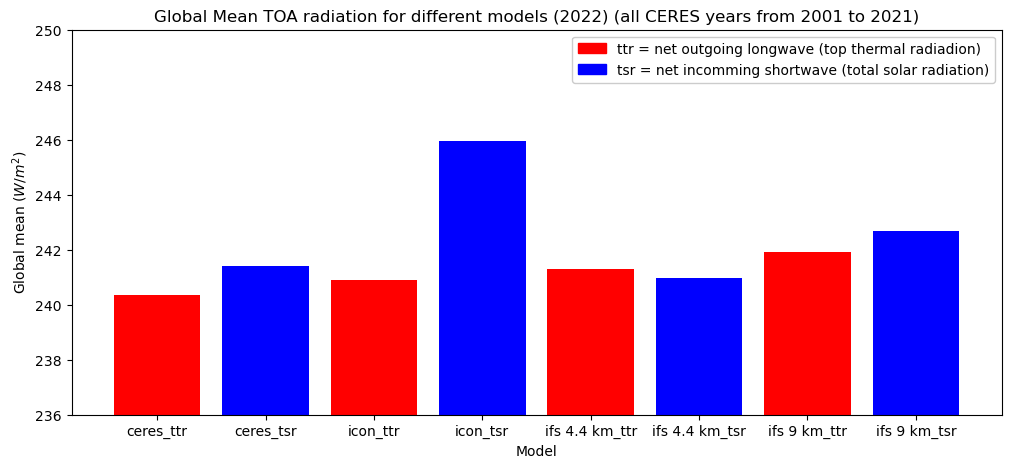

Data has been saved to ./output/data/.
Plot has been saved to ./output/figs/.


In [7]:
datasets = [TOA_ceres_clim_gm, TOA_icon_gm, TOA_ifs_4km_gm, TOA_ifs_9km_gm]
model_names = ['ceres', 'icon', 'ifs 4.4 km', 'ifs 9 km']

barplot_model_data(datasets, model_names, year = 2022)

A similar method will be introduced in the upcomming version of this diagnostic. This will include a boxplot showing more statistics such as median, quantiles, etc.